# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arkie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file C:\Users\arkie\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\arkie\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users

In [4]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
#btc_headlines = newsapi.get_top_headlines(q="bitcoin", language="en")

btc_headlines = newsapi.get_everything(q='bitcoin',
                                      from_param='2022-02-01',
                                      to='2022-02-10',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)
btc_headlines

{'status': 'ok',
 'totalResults': 2806,
 'articles': [{'source': {'id': None, 'name': 'NPR'},
   'author': 'Ryan Lucas',
   'title': 'DOJ arrests New York couple and seizes $3.6 billion in bitcoin related to 2016 hack',
   'description': 'Ilya Lichtenstein and Heather Morgan were arrested Tuesday in Manhattan on money laundering and conspiracy charges.',
   'url': 'https://www.npr.org/2022/02/08/1079220600/doj-arrests-new-york-couple-and-seizes-3-6-billion-in-bitcoin-related-to-2016-ha',
   'urlToImage': 'https://media.npr.org/assets/img/2022/02/08/gettyimages-1352526662_wide-e46f618628900120d613cc1c61d0339e12fcdd26.jpg?s=1400',
   'publishedAt': '2022-02-08T19:07:49Z',
   'content': "The Bitcoin logo is displayed on the screen of a Bitcoin ATM in Los Angeles. The Justice Department a New York couple has been charged with conspiring to launder billions of dollars' worth of stolen … [+2075 chars]"},
  {'source': {'id': 'business-insider', 'name': 'Business Insider'},
   'author': 'prose

In [7]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                      from_param='2022-02-01',
                                      to='2022-02-10',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)
eth_headlines

{'status': 'ok',
 'totalResults': 1310,
 'articles': [{'source': {'id': 'business-insider',
    'name': 'Business Insider'},
   'author': 'insider@insider.com (Adam Morgan McCarthy)',
   'title': 'India will launch a digital rupee in the next year and plans a 30% tax on crypto-related income, according to the finance minister',
   'description': "India's finance minister announced the creation of a digital rupee and a new crypto tax plan as the country moves to embrace blockchain technology.",
   'url': 'https://markets.businessinsider.com/news/currencies/india-crypto-blockchain-cbdc-tax-ethereum-bitcoin-digital-assets-finance-2022-2',
   'urlToImage': 'https://i.insider.com/61f9302e45edd800183b74f1?width=1200&format=jpeg',
   'publishedAt': '2022-02-01T13:51:20Z',
   'content': 'India appears to be warming up to cryptocurrencies, with an announcement by the finance minister on Tuesday of plans for a digital currency rolled out by the central bank, along with a framework to r… [+2254 c

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-08,The Bitcoin logo is displayed on the screen of...,0.0772,0.128,0.121,0.751
1,2022-02-02,The price of bitcoin is set for a bull run in ...,0.0000,0.000,0.000,1.000
2,2022-02-08,"WASHINGTON, Feb 8 (Reuters) - Heather Morgan i...",0.4939,0.106,0.000,0.894
3,2022-02-08,The US justice department has announced the un...,0.5267,0.105,0.000,0.895
4,2022-02-08,Cryptocurrencies like Bitcoin and Ethereum are...,0.4939,0.119,0.000,0.881


In [9]:
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.141845,0.072500,0.044950,0.882500
std,0.451874,0.052911,0.078101,0.087891
min,-0.802000,0.000000,0.000000,0.718000
25%,0.000000,0.033750,0.000000,0.815750
50%,0.224550,0.076000,0.000000,0.887500
75%,0.493900,0.113750,0.052000,0.940750
max,0.680800,0.155000,0.230000,1.000000


In [10]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
etn_df = eth_df[cols]

eth_df.head()

,text,date,compound,positive,negative,neutral
0,India appears to be warming up to cryptocurren...,2022-02-01,0.1531,0.045,0.000,0.955
1,"US stock futures eased on Tuesday, as investor...",2022-02-01,0.8807,0.265,0.000,0.735
2,"February 4, 2022 - Over the last few years, we...",2022-02-04,-0.5267,0.000,0.089,0.911
3,[T]he biggest attraction was having total and ...,2022-02-07,0.2960,0.075,0.045,0.879
4,Personal Finance Insider writes about products...,2022-02-08,0.5346,0.158,0.000,0.842


In [11]:
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.256770,0.096900,0.02720,0.875850
std,0.395317,0.080694,0.05736,0.095518
min,-0.718400,0.000000,0.00000,0.596000
25%,0.096000,0.044000,0.00000,0.846500
50%,0.296000,0.076000,0.00000,0.893000
75%,0.510600,0.131750,0.01125,0.929000
max,0.880700,0.265000,0.19600,1.000000


# Describe the Bitcoin Sentiment & Describe the Ethereum Sentiment
# YOUR CODE HERE!

The Bitcoin and Etherium sentiment in the month of February is mostly neutral at 0.874 and 0.88 scores. This is reflected in the price action of BTC and ETH in the month of February as the price is currently recovering from a multi-month downtrend. 


### Questions:

Q: Which coin had the highest mean positive score?

A: 0.096 for ETH 

Q: Which coin had the highest compound score?

A: ETH at 0.284

Q. Which coin had the highest positive score?

A: ETH at 0.26 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

{'her', 'down', 'out', 'didn', "won't", 'further', 'yourself', 'shan', 'why', 'not', 't', 'my', 'she', 'as', 'under', 'haven', 'any', 'through', "wasn't", 'only', 'was', 'into', 'after', "she's", 'his', 've', 'ours', 'y', 'will', 'won', 'over', 'he', 'what', 'the', 'most', 'their', 'about', 'other', 'its', 'off', 'very', "aren't", 'were', 'now', 'by', 'during', 'them', 'they', "shouldn't", 'couldn', 'a', 'for', 'i', 'same', 'yourselves', 'needn', 'until', 'an', 'myself', 'if', 'to', 'up', 'has', 'm', "shan't", 'below', "hadn't", 'him', 'had', 'having', 'me', 'each', 'against', 'and', "should've", "you've", 'hadn', 'are', 'there', 'or', 'such', "haven't", 'mightn', 'few', 'whom', 'because', 'can', 're', 'between', 'before', 'yours', 'himself', "that'll", 'does', 'when', 's', 'again', 'don', 'we', 'nor', 'our', 'these', 'am', 'weren', 'itself', 'then', 'both', 'which', 'wouldn', 'being', 'own', 'so', 'should', 'll', 'than', 'that', 'wasn', 'ain', 'doing', 'some', 'd', 'where', 'o', "don'

In [49]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words
    
    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    
    
    return tokens

In [50]:
btc_df['text'][0]

"The Bitcoin logo is displayed on the screen of a Bitcoin ATM in Los Angeles. The Justice Department a New York couple has been charged with conspiring to launder billions of dollars' worth of stolen … [+2075 chars]"

In [51]:
# Create a new tokens column for Bitcoin
btc_df['New'] = btc_df['text'].apply(tokenizer)

In [52]:
btc_df.head()

,date,text,compound,positive,negative,neutral,New
0,2022-02-08,The Bitcoin logo is displayed on the screen of...,0.0772,0.128,0.121,0.751,"[bitcoin, logo, displayed, screen, bitcoin, at..."
1,2022-02-02,The price of bitcoin is set for a bull run in ...,0.0000,0.000,0.000,1.000,"[price, bitcoin, set, bull, run, begin, anothe..."
2,2022-02-08,"WASHINGTON, Feb 8 (Reuters) - Heather Morgan i...",0.4939,0.106,0.000,0.894,"[washington, feb, reuters, heather, morgan, wo..."
3,2022-02-08,The US justice department has announced the un...,0.5267,0.105,0.000,0.895,"[us, justice, department, ha, announced, unrav..."
4,2022-02-08,Cryptocurrencies like Bitcoin and Ethereum are...,0.4939,0.119,0.000,0.881,"[cryptocurrencies, like, bitcoin, ethereum, di..."


In [37]:
# Create a new tokens column for Ethereum
eth_df['New'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,text,date,compound,positive,negative,neutral,New
0,India appears to be warming up to cryptocurren...,2022-02-01,0.1531,0.045,0.000,0.955,"[india, appears, warming, cryptocurrencies, an..."
1,"US stock futures eased on Tuesday, as investor...",2022-02-01,0.8807,0.265,0.000,0.735,"[us, stock, future, eased, tuesday, investor, ..."
2,"February 4, 2022 - Over the last few years, we...",2022-02-04,-0.5267,0.000,0.089,0.911,"[february, last, year, observed, uptick, feder..."
3,[T]he biggest attraction was having total and ...,2022-02-07,0.2960,0.075,0.045,0.879,"[biggest, attraction, wa, total, irreversible,..."
4,Personal Finance Insider writes about products...,2022-02-08,0.5346,0.158,0.000,0.842,"[personal, finance, insider, writes, product, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [38]:
from collections import Counter
from nltk import ngrams

In [77]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)


[(('feb', 'reuters'), 4),
 (('justice', 'department'), 2),
 (('new', 'york'), 2),
 (('billion', 'dollar'), 2),
 (('dollar', 'worth'), 2),
 (('worth', 'stolen'), 2),
 (('charswashington', 'feb'), 2),
 (('heather', 'morgan'), 2),
 (('digital', 'currency'), 2),
 (('currency', 'exchange'), 2),
 (('inflation', 'data'), 2),
 (('data', 'due'), 2),
 (('tom', 'brady'), 2),
 (('bitcoin', 'logo'), 1),
 (('logo', 'displayed'), 1),
 (('displayed', 'screen'), 1),
 (('screen', 'bitcoin'), 1),
 (('bitcoin', 'atm'), 1),
 (('atm', 'los'), 1),
 (('los', 'angeles'), 1)]

In [78]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)


[(('insights', 'newsletter'), 3),
 (('newsletter', 'subscriber'), 3),
 (('subscriber', 'get'), 3),
 (('get', 'free'), 3),
 (('free', 'newsletter'), 3),
 (('newsletter', 'stay'), 3),
 (('stay', 'step'), 3),
 (('step', 'ahead'), 3),
 (('ahead', 'technology'), 3),
 (('technology', 'trend'), 3),
 (('trend', 'venture'), 3),
 (('venture', 'capital'), 3),
 (('capital', 'startup'), 3),
 (('startup', 'industry'), 3),
 (('charscb', 'insights'), 2),
 (('medical', 'debt'), 2),
 (('billion', 'usd'), 2),
 (('india', 'appears'), 1),
 (('appears', 'warming'), 1),
 (('warming', 'cryptocurrencies'), 1)]

In [79]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [80]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_df, 10)

[('date', 1),
 ('text', 1),
 ('compound', 1),
 ('positive', 1),
 ('negative', 1),
 ('neutral', 1),
 ('New', 1)]

In [81]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_df, 10)

[('text', 1),
 ('date', 1),
 ('compound', 1),
 ('positive', 1),
 ('negative', 1),
 ('neutral', 1),
 ('New', 1),
 ('bigrams', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

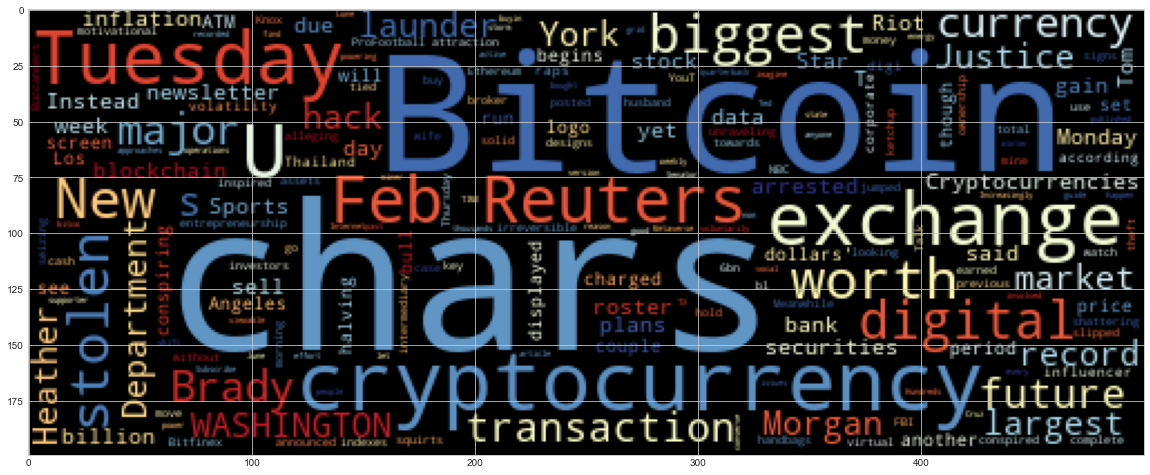

In [90]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
 df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
 plt.imshow(df_cloud)
 plt.show()

wordcloud(btc_df.text.str.cat(), title="BTC Word Count")

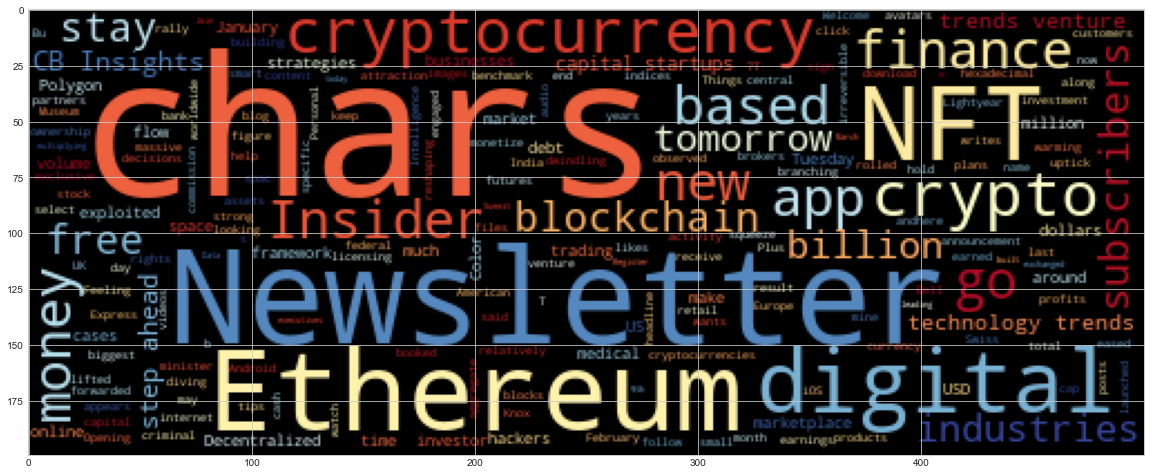

In [92]:
# Generate the Ethereum word cloud
wordcloud(eth_df.text.str.cat(), title="ETH Word Count")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [93]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [94]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [95]:
# Concatenate all of the Bitcoin text together
btc_all = btc_df.text.str.cat()
btc_all

'The Bitcoin logo is displayed on the screen of a Bitcoin ATM in Los Angeles. The Justice Department a New York couple has been charged with conspiring to launder billions of dollars\' worth of stolen … [+2075 chars]The price of bitcoin is set for a bull run in 2024 when it begins another halving period, though the cryptocurrency market will see more \r\nvolatility before then, according to Thailand\'s largest digi… [+1326 chars]WASHINGTON, Feb 8 (Reuters) - Heather Morgan is a would-be corporate influencer who raps about entrepreneurship, designs handbags inspired by ketchup squirts, and signs off from her motivational YouT… [+2259 chars]The US justice department has announced the unraveling of its biggest-ever cryptocurrency theft case, seizing a record-shattering $3.6bn in bitcoin tied to the 2016 hack of digital currency exchange … [+3630 chars]Cryptocurrencies like Bitcoin and Ethereum are digital assets that you can buy or sell without having to use an intermediary, such as a ban

In [99]:
# Run the NER processor on all of the text
btc_all_ner = nlp(btc_all)

# Add a title to the document
btc_all_ner .user_data["title"] = "BTC NER"


In [101]:
# Render the visualization
displacy.render(btc_all_ner, style='ent', jupyter=True)

In [105]:
# List all Entities
for ent in btc_all_ner.ents:
    print(ent.text, ent.label_)

ATM ORG
Los Angeles GPE
The Justice Department ORG
New York GPE
billions of dollars MONEY
2024 DATE
Thailand GPE
Feb 8 DATE
Reuters ORG
US GPE
3.6bn MONEY
2016 CARDINAL
Bitcoin and Ethereum ORG
Feb 8 DATE
Reuters ORG
FBI ORG
Tuesday DATE
morning TIME
2016 DATE
Bitfinex ORG
Knox PERSON
Monday DATE
the previous week DATE
Thursday DATE
above $42,000 MONEY
chars]ProFootball Talk ORG
NBC Sports ORG
Buccaneers PERSON
Tom Brady PERSON
June 1 DATE
Brady PERSON
thousands CARDINAL
every day DATE
Bitcoin PERSON
TIME ORG
weekly DATE
Riot Blockchain PERSON
winter DATE
Lone Star GPE
Riot PERSON
Ted Cruz PERSON
between $15,001 and $50,000 MONEY
Monday DATE
US GPE
Elon Musk PERSON
Feb 8 DATE
Reuters ORG
Tuesday DATE
U.S. GPE
later in the week TIME
Feb 8 DATE
Reuters ORG
Canada GPE
TMX Group ORG
first ORDINAL
NFL ORG
Tom Brady PERSON
Major League Baseball ORG
$135 million MONEY
Tuesday DATE
Tuesday DATE
Ilya Lichtenstein PERSON
Heather Morgan PERSON
New York GPE
a record $4.5 billion dollars MONEY
the 

---

### Ethereum NER

In [106]:
# Concatenate all of the Ethereum text together
eth_all = eth_df.text.str.cat()
eth_all

'India appears to be warming up to cryptocurrencies, with an announcement by the finance minister on Tuesday of plans for a digital currency rolled out by the central bank, along with a framework to r… [+2254 chars]US stock futures eased on Tuesday, as investors booked profits on the end-of-January rally that lifted the benchmark indices the day before, while in Europe, strong earnings from the likes of Swiss b… [+2419 chars]February 4, 2022 - Over the last few years, we have observed an uptick of federal criminal cases in the cryptocurrency space. These cases follow the massive flow of capital into this relatively new a… [+10436 chars][T]he biggest attraction was having total and irreversible ownership over the money she had earned. "I could cash it out. I could hold it. I could watch it go up and down," said Knox. "It was mine." … [+2112 chars]Personal Finance Insider writes about products, strategies, and tips to help you make smart decisions with your money. We may receive a small 

In [111]:
# Run the NER processor on all of the text
eth_all_ner = nlp(btc_all)

# Add a title to the document
eth_all_ner .user_data["title"] = "ETH NER"

In [113]:
# Render the visualization
displacy.render(eth_all_ner, style='ent', jupyter=True)

In [112]:
# List all Entities
for ent in eth_all_ner.ents:
    print(ent.text, ent.label_)

ATM ORG
Los Angeles GPE
The Justice Department ORG
New York GPE
billions of dollars MONEY
2024 DATE
Thailand GPE
Feb 8 DATE
Reuters ORG
US GPE
3.6bn MONEY
2016 CARDINAL
Bitcoin and Ethereum ORG
Feb 8 DATE
Reuters ORG
FBI ORG
Tuesday DATE
morning TIME
2016 DATE
Bitfinex ORG
Knox PERSON
Monday DATE
the previous week DATE
Thursday DATE
above $42,000 MONEY
chars]ProFootball Talk ORG
NBC Sports ORG
Buccaneers PERSON
Tom Brady PERSON
June 1 DATE
Brady PERSON
thousands CARDINAL
every day DATE
Bitcoin PERSON
TIME ORG
weekly DATE
Riot Blockchain PERSON
winter DATE
Lone Star GPE
Riot PERSON
Ted Cruz PERSON
between $15,001 and $50,000 MONEY
Monday DATE
US GPE
Elon Musk PERSON
Feb 8 DATE
Reuters ORG
Tuesday DATE
U.S. GPE
later in the week TIME
Feb 8 DATE
Reuters ORG
Canada GPE
TMX Group ORG
first ORDINAL
NFL ORG
Tom Brady PERSON
Major League Baseball ORG
$135 million MONEY
Tuesday DATE
Tuesday DATE
Ilya Lichtenstein PERSON
Heather Morgan PERSON
New York GPE
a record $4.5 billion dollars MONEY
the 

---